In [1]:
%cd ..
%load_ext autoreload
%autoreload 2


/home/teo/userdata/git_libraries/jgb-omr


In [2]:
from pathlib import Path
from collections import defaultdict
from data_utils import JeongganboReader
from constants import PIECE, START_PAGE


In [31]:
png_dir = Path('jeongganbo-png/pngs/')
reader = JeongganboReader()
pieces_by_instrument = {}
instruments = PIECE.keys() 

# Parse all pieces for each instrument
for instrument in instruments:
  print(f"Parsing {instrument}...")
  png_fns = sorted(list(png_dir.glob(f'{instrument}_pg-*.png')))
  pieces = reader.parse_multiple_pages(png_fns[START_PAGE[instrument]:])
  pieces_by_instrument[instrument] = pieces

piece_names = list(set([piece_name for instrument in instruments for piece_name in PIECE[instrument]]))


# Create a dictionary of pieces by piece name
dict_by_piece_name = {}
for piece_name in piece_names:
  dict_by_piece_name[piece_name] = defaultdict(dict)

for inst in instruments:
  for title, piece in zip(PIECE[inst], pieces_by_instrument[inst]):
    dict_by_piece_name[title][inst] = piece


# Check if all instruments have the same number of jeonggans for each piece
clean_piece_names = []
for piece in dict_by_piece_name:
  len_jeonggans = [len(dict_by_piece_name[piece][inst].jeonggans) for inst in dict_by_piece_name[piece]]
  inst_names = [inst for inst in dict_by_piece_name[piece]]
  if len(set(len_jeonggans)) == 1:
    # print(f"{piece}: {len_jeonggans} / {inst_names}")
    clean_piece_names.append(piece)

dict_by_clean_piece_name = {piece_name: dict_by_piece_name[piece_name] for piece_name in clean_piece_names}


Parsing piri...
Processing jeongganbo-png/pngs/piri_pg-022.png
No jeonggan detected at jeongganbo-png/pngs/piri_pg-022.png
Processing jeongganbo-png/pngs/piri_pg-023.png
No jeonggan detected at jeongganbo-png/pngs/piri_pg-023.png
Processing jeongganbo-png/pngs/piri_pg-024.png
Processing jeongganbo-png/pngs/piri_pg-025.png
Processing jeongganbo-png/pngs/piri_pg-026.png
Processing jeongganbo-png/pngs/piri_pg-027.png
Processing jeongganbo-png/pngs/piri_pg-028.png
Processing jeongganbo-png/pngs/piri_pg-029.png
Processing jeongganbo-png/pngs/piri_pg-030.png
Processing jeongganbo-png/pngs/piri_pg-031.png
Processing jeongganbo-png/pngs/piri_pg-032.png
Processing jeongganbo-png/pngs/piri_pg-033.png
Processing jeongganbo-png/pngs/piri_pg-034.png
Processing jeongganbo-png/pngs/piri_pg-035.png
Processing jeongganbo-png/pngs/piri_pg-036.png
Processing jeongganbo-png/pngs/piri_pg-037.png
Processing jeongganbo-png/pngs/piri_pg-038.png
Processing jeongganbo-png/pngs/piri_pg-039.png
Processing jeongga

In [32]:
dict_by_clean_piece_name = {piece_name: dict_by_piece_name[piece_name] for piece_name in clean_piece_names}


In [35]:
import cv2
import numpy as np

# Assuming you have an image in a NumPy array called 'image'
# Save the image as a PNG file
# cv2.imwrite('image.png', image)


In [38]:
save_dir = Path('jeongganbo-png/splited-pngs/')
save_dir.mkdir(exist_ok=True, parents=True)

for piece_name in dict_by_clean_piece_name:
  piece = dict_by_clean_piece_name[piece_name]
  for inst in piece:
    parsed_piece = piece[inst]
    for jeonggan in parsed_piece.jeonggans:
      jg_name = f"{piece_name.replace(' ', '-')}_{inst}_{jeonggan.piece_beat}"
      cv2.imwrite(str(save_dir / f"{jg_name}.png"), jeonggan.img)

In [39]:
import tarfile

def make_tar_gz(directory_path, output_file):
  with tarfile.open(output_file, "w:gz") as tar:
    tar.add(directory_path, arcname="")

# Example usage
directory_path = save_dir
output_file = 'split_pngs.tar.gz'
make_tar_gz(directory_path, output_file)


In [29]:
jeonggan.img[:,:,0]

array([[ 32,  32,  30, ...,  32,  32,  32],
       [ 32,  37, 102, ..., 102, 102,  55],
       [ 32,  71, 254, ..., 254, 254,  87],
       ...,
       [ 32,  71, 254, ..., 254, 254,  87],
       [ 32,  71, 254, ..., 254, 254,  87],
       [ 32,  55, 198, ..., 198, 198,  78]], dtype=uint8)

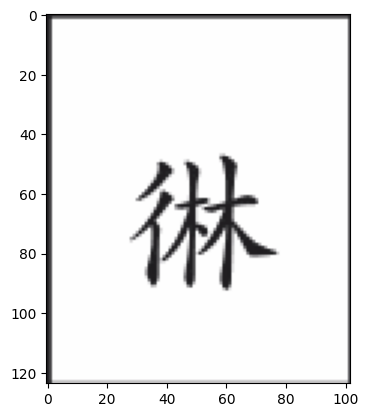

In [34]:
import matplotlib.pyplot as plt
plt.imshow(jeonggan.img)

# 2. Select unique images

In [17]:
import easyocr
reader = easyocr.Reader(['ch_tra'], gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
import cv2


# Read pngs
save_dir = Path('jeongganbo-png/splited-pngs/')
pngs = list(save_dir.glob('*.png'))
len(pngs)

141738

In [28]:
import shutil
from tqdm.auto import tqdm

unique_dir = Path('jeongganbo-png/unique-char-pngs/')
unique_dir.mkdir(exist_ok=True, parents=True)
chars = set()
unique_pngs = []

for png in pngs[:100]:
  img = cv2.imread(str(png))
  result = reader.readtext(img)
  result_char = '.'.join([x[1] for x in result])
  if result_char not in chars:
    chars.add(result_char)
    print(result_char)
    unique_pngs.append(png)
    # Move the PNG file to unique_dir directory
    shutil.move(str(png), str(unique_dir / png.name))



太林
仲6.仙
林6
黃
十3

林
休.黃
汰
姑
黃仲
債
太仲
[.林
淋
德
黃=
楠
潢
黃.匕.林 +
休
/
淋中
佛.乞
林^
/.黃
左.林=
黃^
仲.太
法<.)
.徙
潢.二
夾
橫
太
六二
汰.汰
黃1


In [25]:
chars, unique_pngs

(['太林',
  '仲6.仙',
  '林6',
  '黃',
  '十3',
  '',
  '林',
  '休.黃',
  '汰',
  '姑',
  '黃仲',
  '債',
  '太仲',
  '[.林',
  '淋',
  '德',
  '黃=',
  '楠',
  '潢',
  '黃.匕.林 +',
  '休',
  '/',
  '淋中',
  '佛.乞',
  '林^',
  '/.黃',
  '左.林=',
  '黃^',
  '仲.太',
  '法<.)',
  '.徙',
  '潢.二',
  '夾',
  '橫',
  '太',
  '六二',
  '汰.汰',
  '黃1'],
 [PosixPath('jeongganbo-png/splited-pngs/자진한잎-경풍년-우조두거_haegeum_32.png'),
  PosixPath('jeongganbo-png/splited-pngs/밑도드리_geomungo_424.png'),
  PosixPath('jeongganbo-png/splited-pngs/영산회상-상령산_geomungo_319.png'),
  PosixPath('jeongganbo-png/splited-pngs/여민락_piri_2100.png'),
  PosixPath('jeongganbo-png/splited-pngs/현악취타-군악_haegeum_384.png'),
  PosixPath('jeongganbo-png/splited-pngs/여민락_gayageum_2166.png'),
  PosixPath('jeongganbo-png/splited-pngs/여민락_piri_1509.png'),
  PosixPath('jeongganbo-png/splited-pngs/남창계면-언편_piri_62.png'),
  PosixPath('jeongganbo-png/splited-pngs/평조회상-상현도드리_daegeum_49.png'),
  PosixPath('jeongganbo-png/splited-pngs/평조회상-군악_piri_578.png'),
  PosixPath('jeongganbo-png

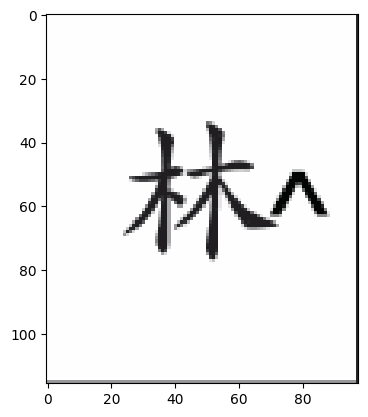

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [18]:
dict_by_clean_piece_name[clean_piece_names[2]]['daegeum'].jeonggans

[Jeonggan at Gak 1, Daegang 0, Beat 0, Piece Beat 20, img (1536, 496),
 Jeonggan at Gak 1, Daegang 0, Beat 1, Piece Beat 21, img (1536, 615),
 Jeonggan at Gak 1, Daegang 0, Beat 2, Piece Beat 22, img (1536, 734),
 Jeonggan at Gak 1, Daegang 0, Beat 3, Piece Beat 23, img (1536, 854),
 Jeonggan at Gak 1, Daegang 0, Beat 4, Piece Beat 24, img (1536, 974),
 Jeonggan at Gak 1, Daegang 0, Beat 5, Piece Beat 25, img (1536, 1093),
 Jeonggan at Gak 1, Daegang 1, Beat 6, Piece Beat 26, img (1536, 1214),
 Jeonggan at Gak 1, Daegang 1, Beat 7, Piece Beat 27, img (1536, 1333),
 Jeonggan at Gak 1, Daegang 1, Beat 8, Piece Beat 28, img (1536, 1453),
 Jeonggan at Gak 1, Daegang 1, Beat 9, Piece Beat 29, img (1536, 1572),
 Jeonggan at Gak 1, Daegang 2, Beat 10, Piece Beat 30, img (1536, 1694),
 Jeonggan at Gak 1, Daegang 2, Beat 11, Piece Beat 31, img (1536, 1812),
 Jeonggan at Gak 1, Daegang 2, Beat 12, Piece Beat 32, img (1536, 1932),
 Jeonggan at Gak 1, Daegang 2, Beat 13, Piece Beat 33, img (1536, 